In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
time = np.arange(0, 10, 0.1);

In [3]:
x_train = np.empty((10000,100))
y_train = np.empty((10000))
x_test = np.empty((1000,100))
y_test = np.empty((1000))

In [4]:
random_train = np.random.rand(10000)
random_test = np.random.rand(1000)

In [5]:
for i in range(0,10000):
    if random_train[i] < 0.5:
        x_train[i] = np.sin(time).reshape(1,100) + np.random.randn(100).reshape(1,100)
        y_train[i] = 1
    else: 
        x_train[i] = np.random.randn(100).reshape(1,100)
        y_train[i] = 0

In [6]:
for i in range(0,1000):
    if random_test[i] < 0.5:
        x_test[i] = np.sin(time).reshape(1,100) + np.random.randn(100).reshape(1,100)
        y_test[i] = 1
    else: 
        x_test[i] = np.random.randn(100).reshape(1,100)
        y_test[i] = 0

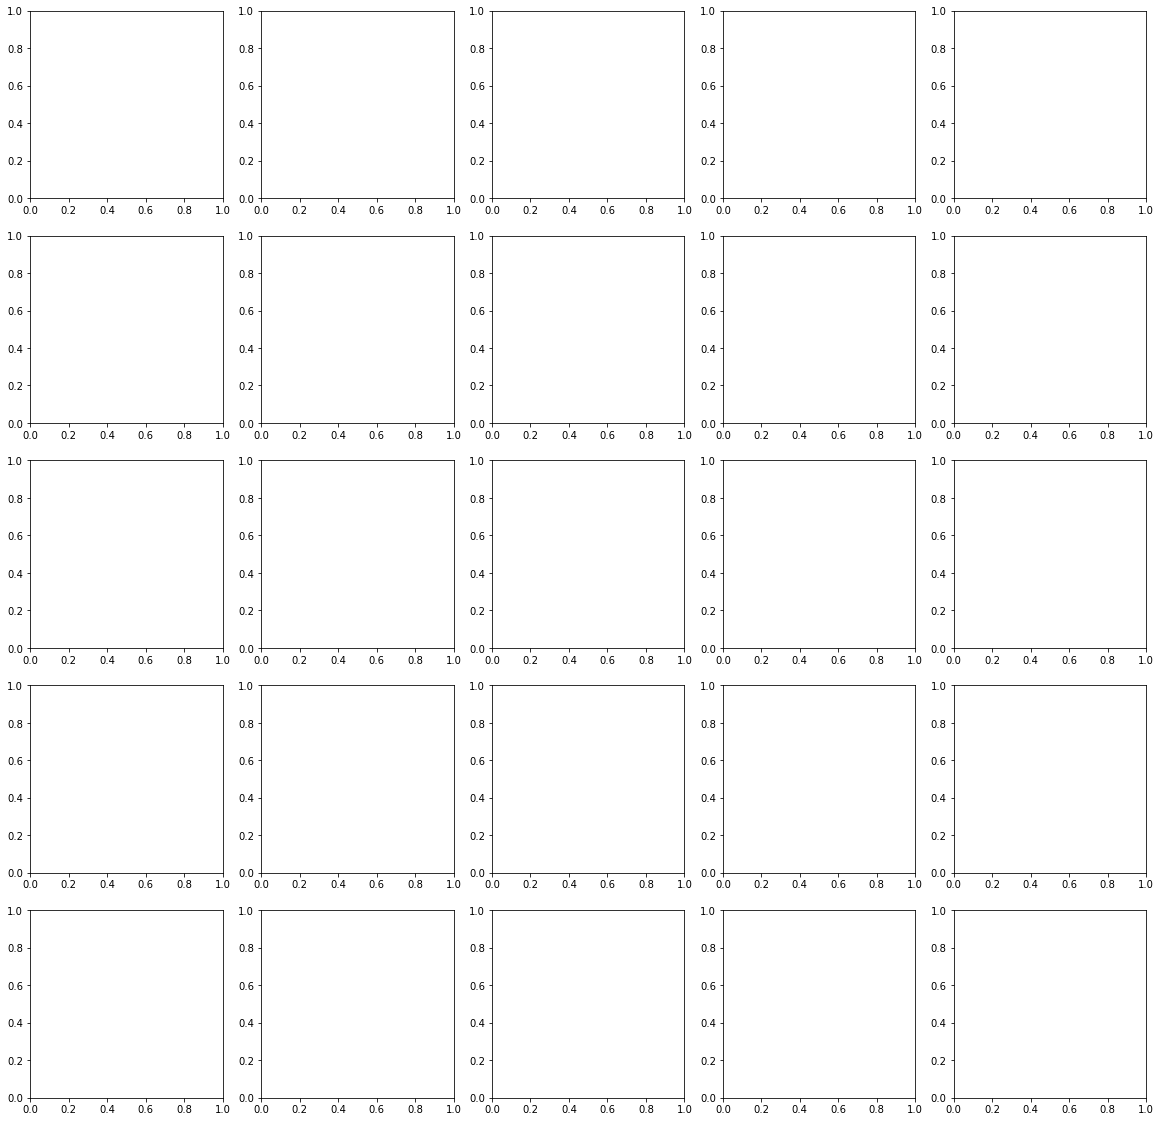

In [7]:
fig_test,axes_test = plt.subplots(5,5,figsize=(20,20))

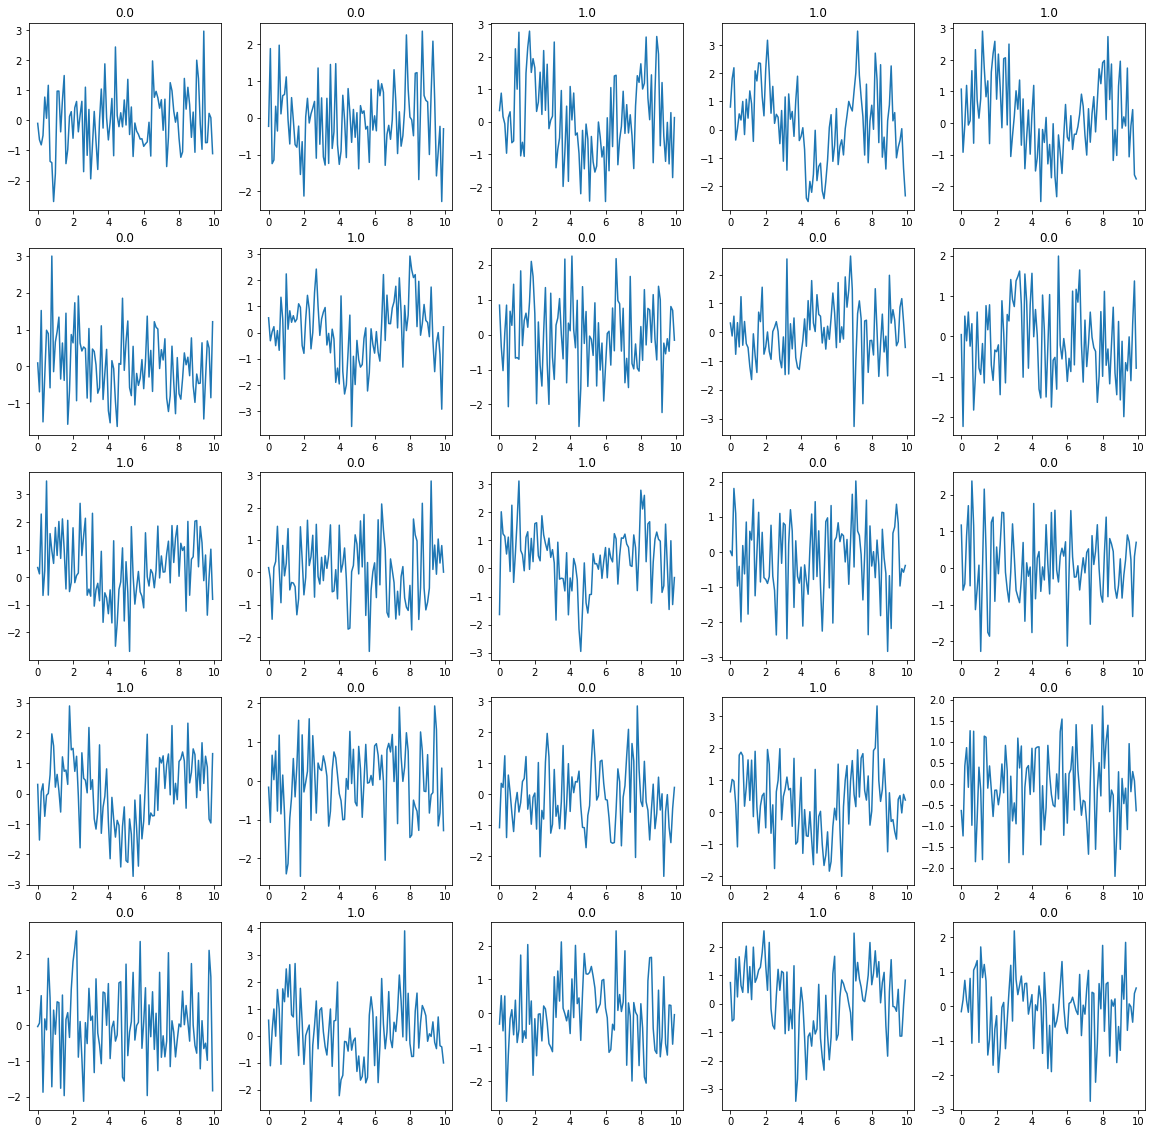

In [8]:
##Plotting first 25 test data with their corresponding labels 
for i in range(5):
    for j in range(5):
        axes_test[i][j].plot(time,x_test[i*5+j])
        axes_test[i][j].set_title(y_test[i*5+j])
fig_test

In [9]:
model1 = tf.keras.Sequential(
  [
      tf.keras.layers.Reshape(input_shape=(100,), target_shape=(100, 1)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128,activation="relu"),
      tf.keras.layers.Dense(1, activation='relu')
  ])
##I have also tried with convolutional layers but nothing has changes which is normal since it already has %99.7 accuracy

In [10]:
model1.compile(optimizer='adam',
              loss=tf.keras.losses.binary_crossentropy ,
              metrics=['accuracy'])

In [11]:
model1.fit(x_train, y_train, epochs=10)

Train on 10000 samples
Epoch 1/10
10000/10000 [==============================] - 0s 48us/sample - loss: 0.3589 - accuracy: 0.9521
Epoch 2/10
10000/10000 [==============================] - 0s 20us/sample - loss: 0.0168 - accuracy: 0.9955
Epoch 3/10
10000/10000 [==============================] - 0s 21us/sample - loss: 0.0258 - accuracy: 0.9957
Epoch 4/10
10000/10000 [==============================] - 0s 21us/sample - loss: 0.0067 - accuracy: 0.9986
Epoch 5/10
10000/10000 [==============================] - 0s 21us/sample - loss: 0.0042 - accuracy: 0.9998
Epoch 6/10
10000/10000 [==============================] - 0s 21us/sample - loss: 0.0035 - accuracy: 0.9998
Epoch 7/10
10000/10000 [==============================] - 0s 22us/sample - loss: 0.0033 - accuracy: 0.9998
Epoch 8/10
10000/10000 [==============================] - 0s 20us/sample - loss: 0.0032 - accuracy: 0.9998
Epoch 9/10
10000/10000 [==============================] - 0s 21us/sample - loss: 0.0031 - accuracy: 0.9998
Epoch 10/10
10

In [12]:
model1.evaluate(x_test,  y_test)

1000/1000 [==============================] - 0s 79us/sample - loss: 0.0029 - accuracy: 0.9990


[0.0028552084378898144, 0.999]

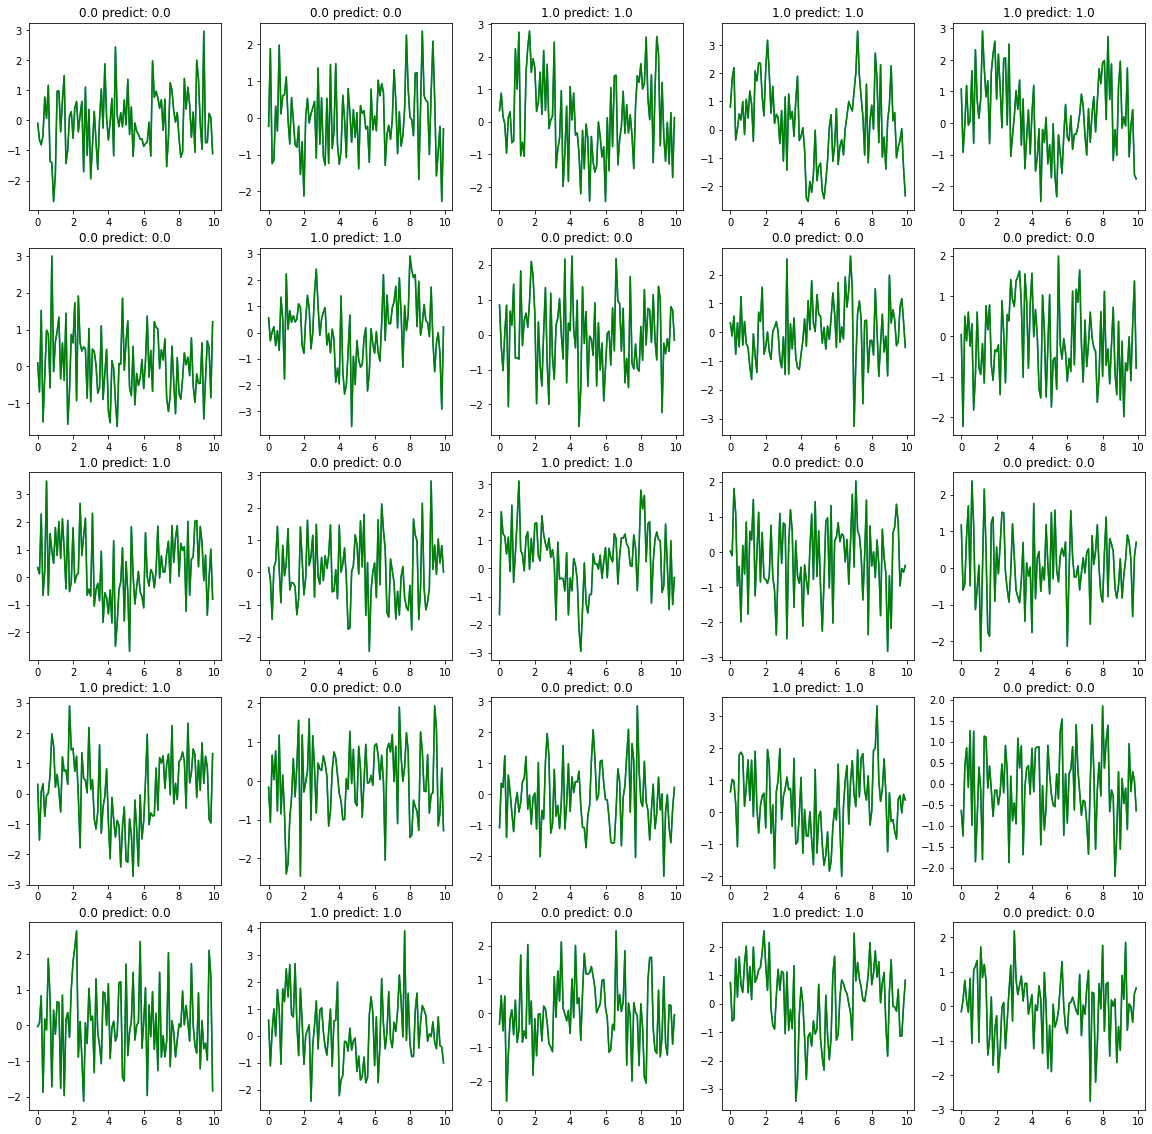

In [13]:
##Plotting first 25 test data with corresponding predictions
for i in range(5):
    for j in range(5):
        color = "r"
        if (y_test[i*5+j] == bool(model1.predict(x_test[i*5+j:i*5+j+1])[0][0])):
            color = "g"
        axes_test[i][j].plot(time,x_test[i*5+j],color=color)
        axes_test[i][j].set_title("{} predict: {}".format(y_test[i*5+j],float(bool(model1.predict(x_test[i*5+j:i*5+j+1])[0][0]))))
fig_test
##I hardly can label those but my model can, I am a proud father.

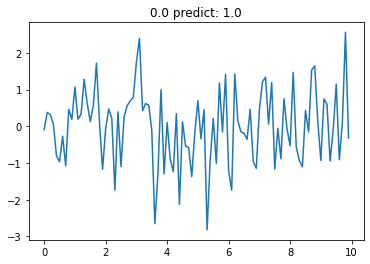

In [14]:
##Plotting first mislabel and finding it's index
mistake_index = 0
for i in range(1000):
    if (y_test[i] != bool(model1.predict(x_test[i:i+1])[0][0])):
        plt.plot(time,x_test[i])
        plt.title("{} predict: {}".format(y_test[i],float(bool(model1.predict(x_test[i:i+1])[0][0]))))
        mistake_index = i
        break

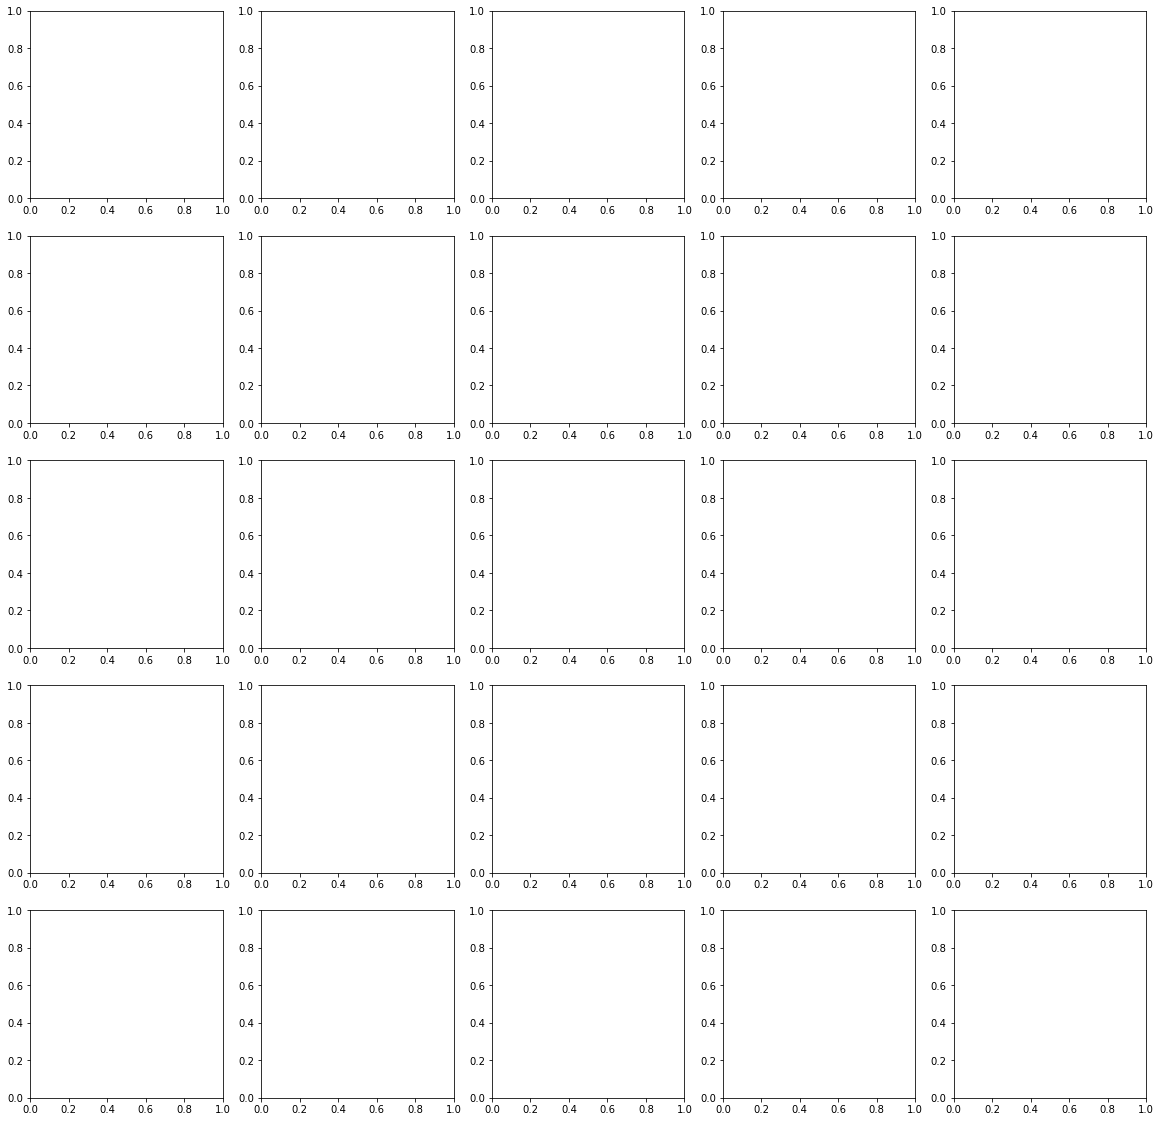

In [15]:
##Plotting first 25 test data starting from (mistake_index-14) with corresponding predictions
fig_test1,axes_test1 = plt.subplots(5,5,figsize=(20,20))

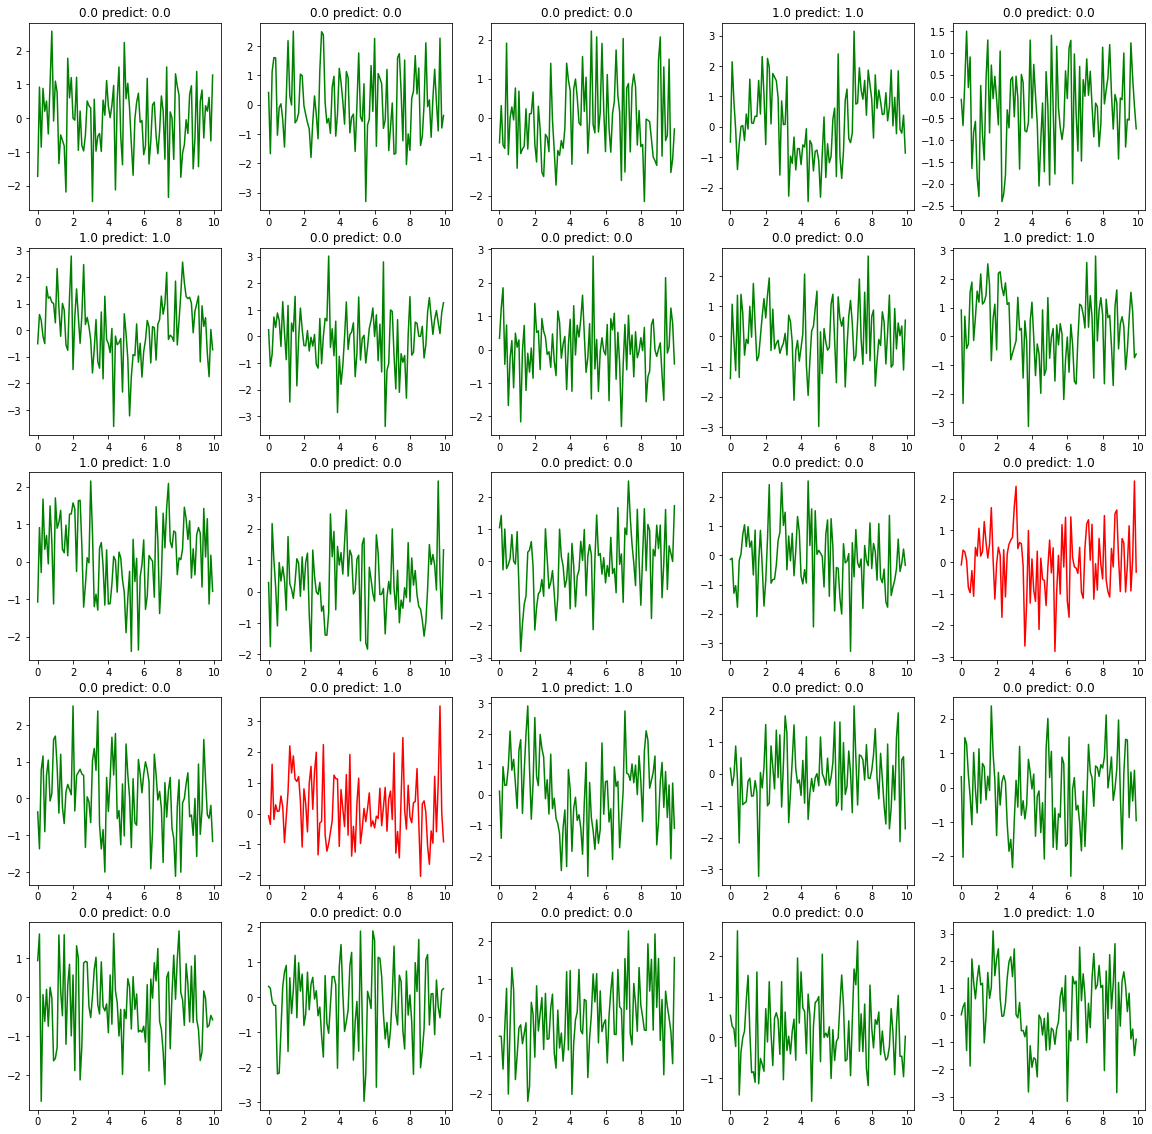

In [16]:
for i in range(5):
    for j in range(5):
        color = "r"
        if (y_test[mistake_index-14+i*5+j] == bool(model1.predict(x_test[mistake_index-14+i*5+j:mistake_index-14+i*5+j+1])[0][0])):
            color = "g"
        axes_test1[i][j].plot(time,x_test[mistake_index-14+i*5+j],color=color)
        axes_test1[i][j].set_title("{} predict: {}".format(y_test[mistake_index-14+i*5+j],float(bool(model1.predict(x_test[mistake_index-14+i*5+j:mistake_index-14+i*5+j+1])[0][0]))))
fig_test1